# Example usage

Here we will demonstrate how to use `pynyairbnb` to run an analysis on New York City Airbnb Data.

In [1]:
from pynyairbnb.data_preprocessing import create_dir_if_not_exists, read_data, convert_missing_values, split_data, save_dataframes, add_price_category, data_preprocessing
from pynyairbnb.plotting import rank_correlations, sns_plotting, plot_pynyairbnb
from pynyairbnb.pynyairbnb import build_preprocessor, build_clf_model, knn_param_optimization, nyairbnb_analysis
import pandas as pd

ModuleNotFoundError: No module named 'pynyairbnb'

# Reading and Preprocessing Data

We can use the `data_preprocessing` function from the `data_preprocessing` module to load and prepare the data before moving onto later analyses. This function is a union of several other smaller functions in the module like `read_data` and `convert_missing_values`, all of which can also be accessed if and when needed. `data_preprocessing` loads the data from the URL, performs the necessary EDA, splits the data into training and test dataframes and saves them all as CSVs to the provided outpath.

In [2]:
data_preprocessing("http://data.insideairbnb.com/united-states/ny/new-york-city/2023-12-04/visualisations/listings.csv", "sample_data")

In [3]:
train_df = pd.read_csv("sample_data/train_df.csv")
train_df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price_category
0,1019653865784274979,Loft in New York · ★New · 1 bedroom · 2 beds ·...,545416054,Charles,Manhattan,Harlem,40.812318,-73.945541,Entire home/apt,375,1,0,NaN,0.00,9,256,0,Exempt,350+
1,21621926,Home in Queens · ★4.45 · 1 bedroom · 1 bed · 1...,157295347,Ana,Queens,Woodside,40.744160,-73.903510,Private room,35,30,75,2023-09-26,1.02,3,342,19,NaN,0-50
2,651524831580142228,Rental unit in New York · 2 bedrooms · 3 beds ...,16480700,Geo And Alex,Manhattan,Hell's Kitchen,40.760486,-73.994578,Entire home/apt,356,30,0,NaN,0.00,24,55,0,NaN,350+


# Creating Visualizations

The `plotting` module has a couple of functions that are quite handy to help generate the plots and tables we need for the analysis. We can use the `plot_pynyairbnb` function to create _all_ the visualizations and tables we would need for the analysis in one go. However, if you want, you can also call one of the contained functions `rank_correlations` or `sns_plotting` where and when necessary.

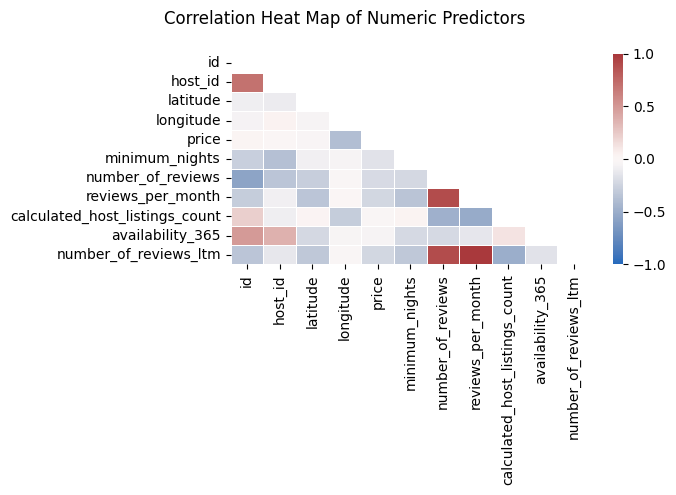

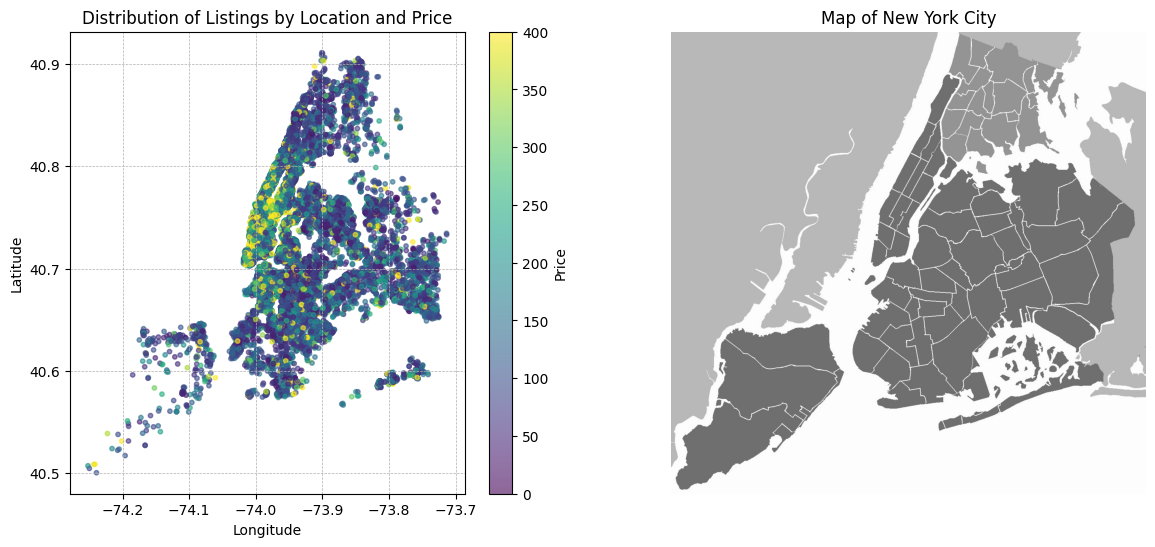

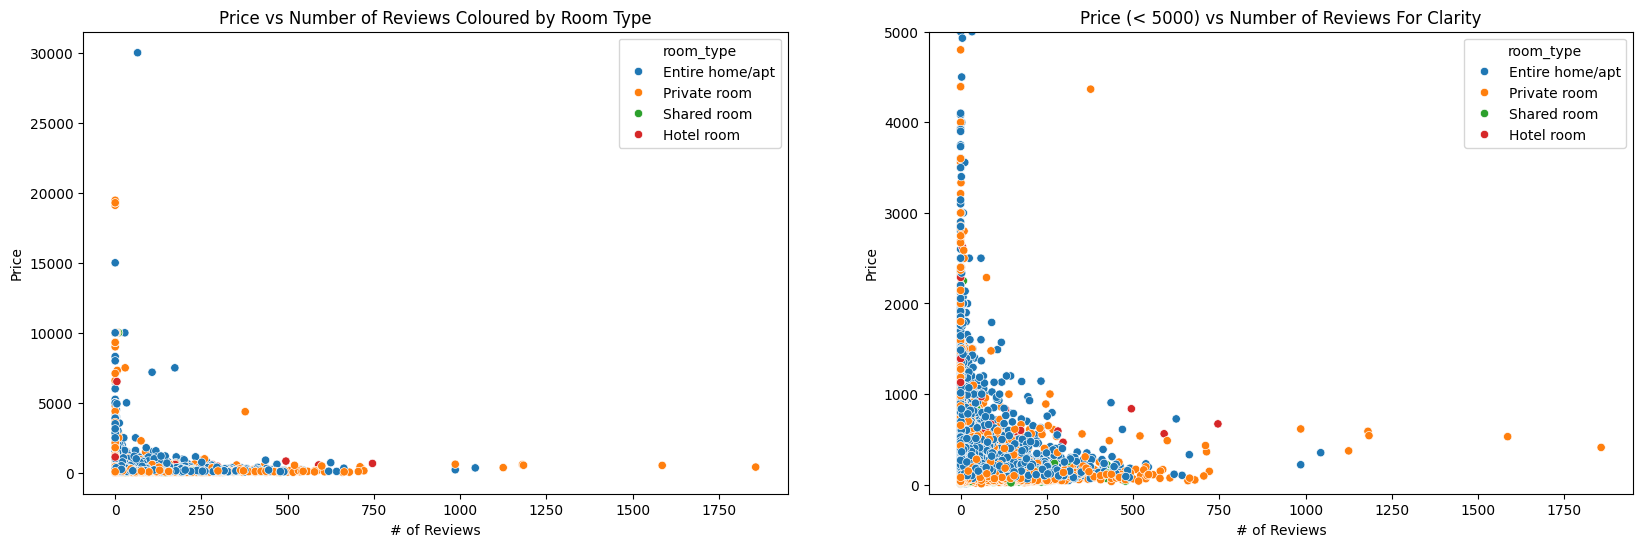

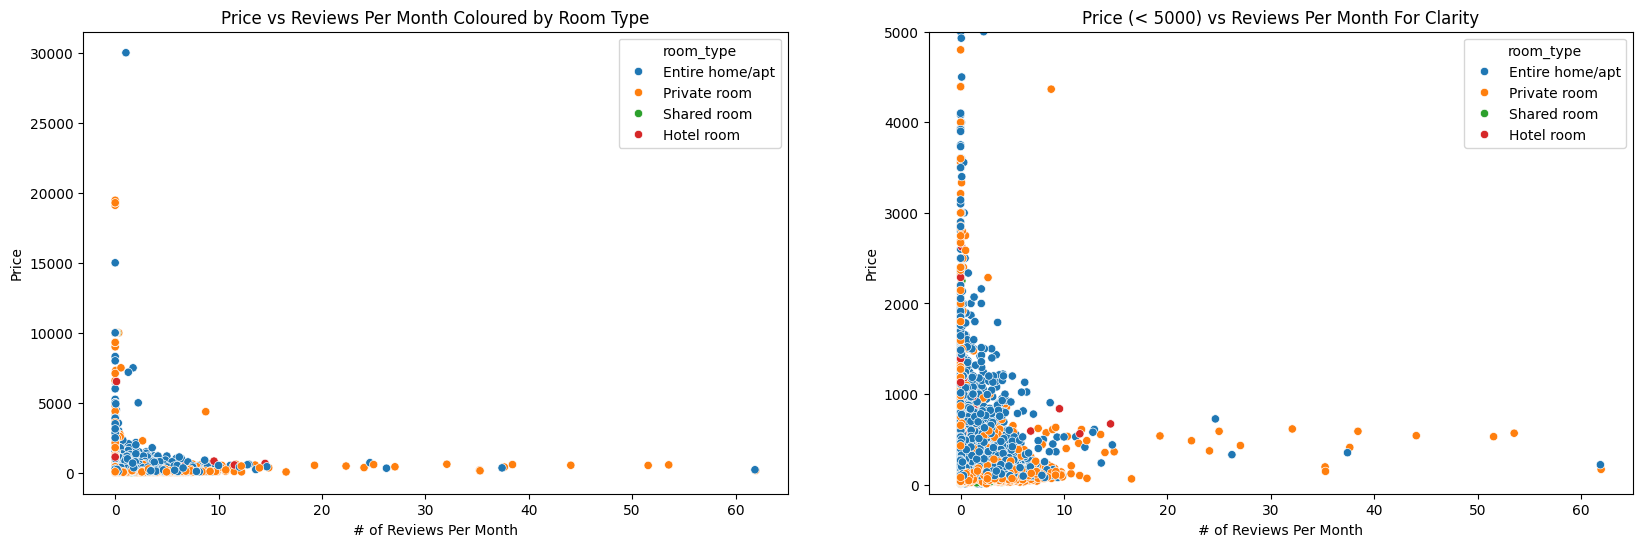

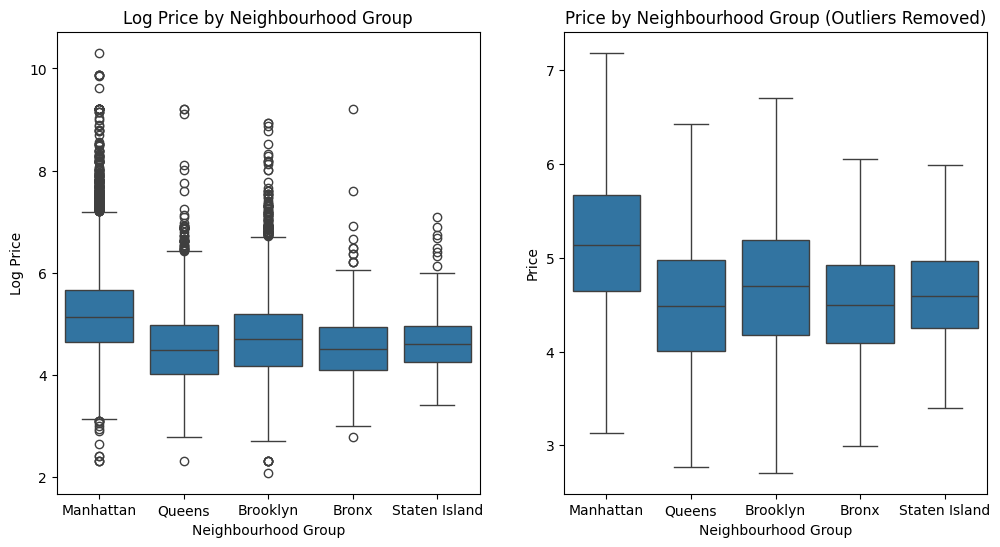

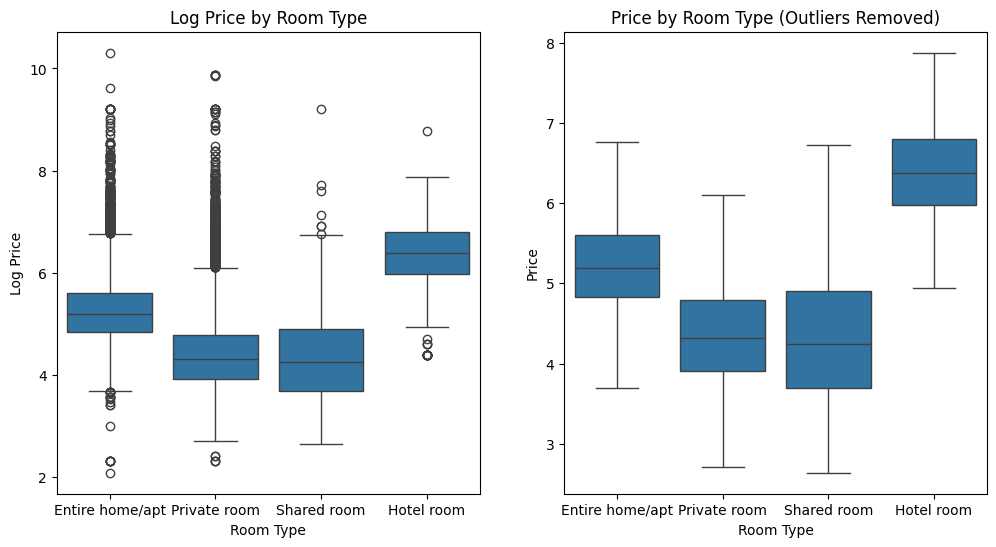

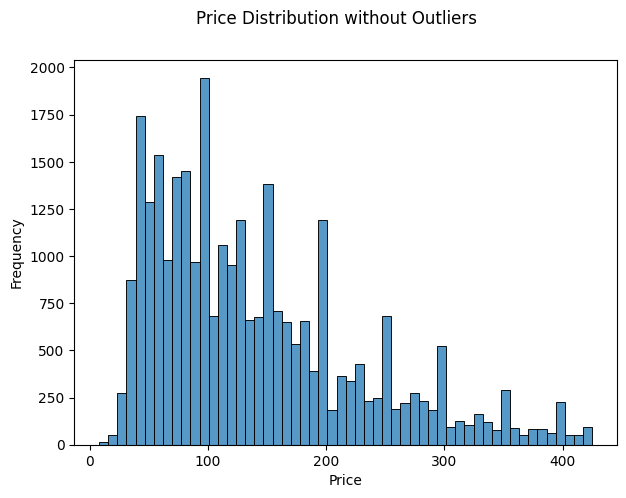

In [4]:
plot_pynyairbnb("sample_data/train_df.csv", "sample_results/figures", "sample_results/tables")

# Building the model and Assessing it

We have the `nyairbnb_analysis` function from the `pynyairbnb` to run our entire analysis from top to bottom (including hyperparameter optimization). This function is a union of the other 3 functions in the module - `build_preprocessor`, `build_clf_model` `knn_param_optimization`, all of which can also be accessed if and when needed. `nyairbnb_analysis` loads the data from the provided input directory, builds the model and performs the optimization, and saves the outputs as tables to the provided output directory.

NOTE: The function `knn_param_optimization` (and as a result, the `nyairbnb_analysis` function) can take about 5 minutes to run.

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
nyairbnb_analysis("sample_data", "sample_results/tables")
hyperparam_opt = pd.read_csv("sample_results/tables/hyperparam_classification_report.csv")
hyperparam_opt

Fitting 3 folds for each of 5 candidates, totalling 15 fits


,Unnamed: 0,precision,recall,f1-score,support
0,0-50,0.654348,0.590196,0.620619,1020.000000
1,50-100,0.546672,0.661268,0.598534,2161.000000
2,100-150,0.410331,0.436151,0.422847,1621.000000
3,150-200,0.330078,0.312673,0.321140,1081.000000
4,200-250,0.274038,0.186579,0.222006,611.000000
5,250-300,0.272340,0.178771,0.215852,358.000000
6,300-350,0.287356,0.116279,0.165563,215.000000
7,350+,0.632856,0.668219,0.650057,859.000000
8,accuracy,0.486122,0.486122,0.486122,0.486122
9,macro avg,0.426002,0.393767,0.402077,7926.000000
